<h1><center>Evaluation apprentissage par renforcement</center></h1>
<h3><center>Groupe : Aymen BOUHOU - Mohammed Zineddine BOUCHERIR - El Mehdi BECHNIKHA<h3><center>

### Execice 1 - Prédiction 

Importation des bibliotheques

In [95]:
import base
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

import warnings
warnings.filterwarnings("ignore")

##### Question 1- 

Implémentation de l'algorithme de prédiction Monte-Carlo (MC)

In [43]:
def MC(pi,env, nb_episode=100, gamma=0.5, na=4):

    nbr_state = env.get_nb_states()
    S = np.zeros(nbr_state)
    V = np.zeros(nbr_state)
    n = np.zeros(nbr_state)

    for i in range(nb_episode):
        final = False
        s = env.reset()
        episode = []
    
        while not final:
            a = np.random.choice(na, p=pi[s])
            ns, r, final, _ = env.step(a)
            episode.append([s, a, r, ns])
            s = ns

        g = 0
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s] += 1
            S[s] += g
            V[s] = S[s] / n[s]
    
    return V    

Implémentation de l'algorithme de prédiction Temporal-Difference (TD0)

In [44]:
def TD0(pi,env, nb_episode=100 , alpha=0.1, gamma=0.5, na=4):
    
    nbr_state = env.get_nb_states()
    V = np.zeros(nbr_state)
    
    for i in range(nb_episode):
        final = False
        s = env.reset()
        
        while not final:
            a = np.random.choice(na, p=pi[s])
            ns, r, final, _ = env.step(a)
            V[s] += alpha*(r+gamma*V[ns]-V[s])
            s = ns
    
    return V 

##### Question 2- 

Comparaison entre MC et TD(0) à partir du calcul de l'erreur de prédiction par une distance euclidienne entre les vecteurs de valeurs calculés et le vecteur de valeurs produit par IPE

Implémentation de l'algorithme de prediction IPE qui servira comme algo de base pour la camparaison entre MC et TD0 

In [45]:
def calculer_q(env, v, gamma=0.5):
    return np.sum(env.p() * (env.r() + gamma*v[np.newaxis, np.newaxis, :]), axis=2)

def ipe(pi, env, gamma=0.5, epsilon=0.01):
    nbr_state = env.get_nb_states()

    v = np.zeros((nbr_state))
    q = calculer_q(env, v, gamma)
    nv = np.sum(pi * q, axis=1)
    
    delta = np.sum(np.abs(nv - v))
    while delta > epsilon:
        v = nv
        q = calculer_q(env, v, gamma)
        nv = np.sum(pi * q, axis=1)
        delta = np.sum(np.abs(nv - v))
    
    return nv

Définition de l'environnement :  
- Environnement de type Maze ;
- Appliquons la politique pi = " Dans chaque état appliquer les probabilités d'actions {W: 0.1, S:0.4, E:0.4, N:0.1} "

In [117]:
env = base.Maze()
nbr_state = env.get_nb_states()
na = env.get_nb_actions()
pi = np.array([[0.1, 0.4, 0.4, 0.1]]*nbr_state)

array([[0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1]])

Les valeurs d'état de l'algorithme MC suivant la politique pi, dans l'environnement Maze, apres 100 nombre d'episodes, de gamma 0.5 et de nombre d'actions 4, sont :

In [118]:
MC(pi,env)

array([1.87266858e+01, 7.03630792e+01, 2.37606299e+02, 0.00000000e+00,
       2.32059740e+00, 0.00000000e+00, 4.46730295e+01, 0.00000000e+00,
       5.64855170e+00, 3.68180543e+01, 1.33546177e+02, 0.00000000e+00,
       4.27231659e-01, 0.00000000e+00, 5.22027445e+02, 0.00000000e+00])

Les valeurs d'état de l'algorithme TD0 suivant la politique pi, dans l'environnement Maze, apres 100 nombre d'episodes, de gamma 0.5 et de nombre d'actions 4, sont :

In [48]:
TD0(pi,env)

array([ 10.17154825,  56.547592  , 256.28635347,   0.        ,
         2.60205757,   0.        ,  49.20626779,   0.        ,
         8.56417887,  32.42509916, 122.79266406,   0.        ,
         0.65897666,   0.        , 477.62415278,   0.        ])

Les valeurs d'état de l'algorithme IPE suivant la politique pi, dans l'environnement Maze, apres 100 nombre d'episodes, de gamma 0.5 et de nombre d'actions 4, sont :

In [49]:
ipe(pi,env)

array([ 11.59279286,  49.16764138, 181.48179409,   0.        ,
         3.00185758,   0.        ,  49.74737104,   0.        ,
         8.36084783,  38.20592509, 141.18327338,   0.        ,
         0.75939102,   0.        , 542.745494  ,   0.        ])

Calcul des erreurs de prédiction par une distance 
euclidienne entre MC/TD0 et IPE

In [119]:
MC_errors=[np.linalg.norm(MC(pi,env,nb_episode) - ipe(pi,env)) for nb_episode in range(1,2000,50)]

In [120]:
TD0_errors=[np.linalg.norm(TD0(pi,env,nb_episode) - ipe(pi,env)) for nb_episode in range(1,2000,50)]

Représentation graphique de l'évolution de l'erreur en fonction du nombre 
d'épisodes effectués

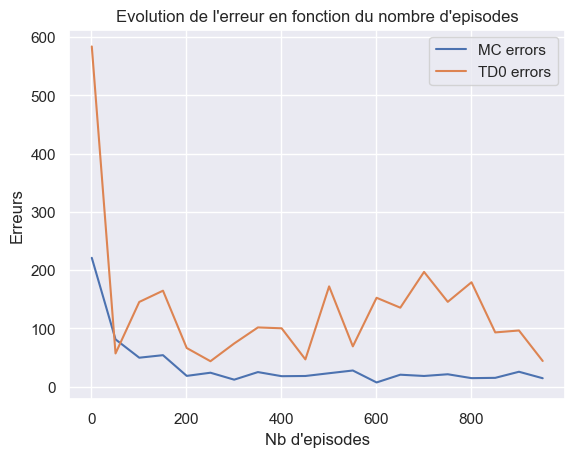

In [52]:
MC_errors = np.array(MC_errors)
TD0_errors = np.array(TD0_errors)

fig, ax = plt.subplots()

ax.plot(range(1,1000,50),MC_errors, label='MC errors')
ax.plot(range(1,1000,50),TD0_errors, label='TD0 errors')

ax.set(xlabel="Nb d'episodes", ylabel='Erreurs', title="Evolution de l'erreur en fonction du nombre d'episodes")
ax.legend()

plt.show()

On remarque que l'algorithme MC a convergé rapidement alors que l'algorithme TD0 a pris plus de temps pour converger. C'est parce que MC est efficace avec des valeurs petites et trouve rapidement les bonnes valeurs.

### Execice 2 - Contrôle 

In [115]:
def egreedy(q, s, nb_episode, epsilon, D):
    
    if nb_episode <= D:
        ep = epsilon
    else:
        ep = epsilon / math.sqrt(nb_episode - D)
    
    if np.random.rand()<ep:     
        return np.random.randint(0, q.shape[1])
    else:
        return np.argmax(q[s])

In [ ]:
def softmax(q, s, nb_episode, T0, D):
    
    if nb_episode <= D:
        T = T0
    else:
        T = T0 / math.sqrt(nb_episode - D)
        
    exp_val = [math.exp(i / T) for i in q[s]]
    softmax_values = [i / np.sum(exp_val) for i in exp_val]
    return random.choices(range(len(q[s])), np.divide(softmax_values, np.sum(softmax_values)), k=1)[0]

In [54]:

def monte_carlo_control(env, gamma = 0.5, epsilon = 0.5, T0 = 100, nb_ep_limit = 1000, D = 4000, methode = "egreedy"):
    
    na = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), na))
    n = np.zeros((env.get_nb_states(), na))
    
    gain = np.zeros(nb_ep_limit)
    nbs = np.zeros(nb_ep_limit)
    
    pi = np.ones((env.get_nb_states(), na)) / na
    print(pi.shape)
    
    for k in range(1, nb_ep_limit+1):
        # Faire un episode
        s = env.reset()
        episode = []
    
        while not env.is_final(s):
            a = np.random.choice(na, p = [0.25,0.25,0.25,0.25]) 
            ns, r, _, _ = env.step(a)
            episode.append([s, a, ns, r])
            s = ns
        
        # Mettre à jour Q
        retour = 0
        
        for s, a, ns, r in reversed(episode):
            retour = r + gamma * retour
            n[s, a] += 1
            q[s, a] += 1/n[s, a]*(retour - q[s, a])
    
        
        # Mettre à jour epsilon et pi
        epsilon = 1 / k
        
        if methode == "egreedy":
            pi = egreedy(q, s, len(episode), epsilon, D)
        elif methode == "softmax":
            pi = softmax(q, s, len(episode), T0, D)
        else:
            print("Méthode non reconnue")
            sys.exit()
        
        pi = egreedy(q, s, len(episode), epsilon, D) 
        gain[k-1] = retour
        nbs[k-1] = len(episode)
        
    return gain

In [55]:
monte_carlo_control(env, gamma = 1, nb_ep_limit= 1000, epsilon=1, D=4000)

(16, 4)


array([ 400., 1000.,  400.,  400.,  400.,  400.,  400.,  400.,  400.,
       1000.,  400.,  400., 1000.,  400., 1000., 1000., 1000.,  400.,
        400., 1000., 1000.,  400., 1000.,  400.,  400.,  400.,  400.,
       1000., 1000.,  400., 1000.,  400.,  400.,  400., 1000., 1000.,
        400.,  400., 1000.,  400.,  400., 1000.,  400.,  400.,  400.,
        400.,  400., 1000.,  400.,  400., 1000., 1000., 1000.,  400.,
        400.,  400., 1000.,  400.,  400., 1000.,  400.,  400.,  400.,
       1000.,  400., 1000.,  400.,  400.,  400.,  400.,  400., 1000.,
        400., 1000., 1000., 1000., 1000.,  400.,  400.,  400.,  400.,
       1000., 1000.,  400., 1000., 1000.,  400.,  400.,  400.,  400.,
        400., 1000.,  400., 1000.,  400.,  400.,  400.,  400.,  400.,
        400.,  400.,  400., 1000., 1000.,  400., 1000.,  400., 1000.,
        400.,  400.,  400., 1000.,  400.,  400.,  400., 1000.,  400.,
        400., 1000.,  400.,  400., 1000.,  400., 1000.,  400.,  400.,
        400., 1000.,

In [56]:
def qlearning(env, gamma = 0.5, alpha = 0.5, epsilon = 0.5, T0 = 100, nb_ep_limit = 1000, D = 4000, methode = "egreedy"):
    
    na = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), na))
    gain = np.zeros(nb_ep_limit)
    nbs = np.zeros(nb_ep_limit)
    
    for k in range(1, nb_ep_limit+1):      
        
        s = env.reset()
        while not env.is_final(s):
            
            if methode == "egreedy":
                a = egreedy(q, s, k, epsilon, D)
            elif methode == "softmax":
                a = softmax(q, s, k, T0, D)
            else:
                print("Méthode non reconnue")
                sys.exit()
            
            ns, r, final, _ = env.step(a)
            
            if final:
                
                target = r
            else:
                target = r + gamma * np.max(q[ns])
                
            gain[k-1] += r
            nbs[k-1] += 1
            q[s, a] += alpha * (target - q[s, a])
            s = ns
    
    return gain

In [71]:
qlearning(env, gamma = 0.9, alpha = 0.1, epsilon=0.5, nb_ep_limit = 5000, D=4000)

array([ 400.,  400.,  400., ..., 1000., 1000., 1000.])

In [58]:
def sarsa(env, gamma = 0.5, alpha = 0.5, epsilon = 0.5, T0 = 100, nb_ep_limit = 1000, D = 4000, methode = "egreedy"):
    na = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), na))
    gain = np.zeros(nb_ep_limit)
    nbs = np.zeros(nb_ep_limit)
    
    for k in range(1, nb_ep_limit+1):      
        
        s = env.reset()
        
        if methode == "egreedy":
            a = egreedy(q, s, k, epsilon, D)
        elif methode == "softmax":
            a = softmax(q, s, k, T0, D)
        else:
            print("Méthode non reconnue")
            sys.exit()
            
        while not env.is_final(s):
            
            ns, r, final, _ = env.step(a)
            
            if methode == "egreedy":
                na = egreedy(q, ns, k, epsilon, D)
            elif methode == "softmax":
                na = softmax(q, ns, k, T0, D)
            else:
                print("Méthode non reconnue")
                sys.exit()

            if final:
                
                target = r
            else:
                target = r + gamma * q[ns,na]
                
            gain[k-1] += r
            nbs[k-1] += 1
            q[s, a] += alpha * (target - q[s, a])
            s = ns
            a=na
    
    return gain

In [92]:
sarsa(env, gamma = 1, alpha = 0.5, epsilon=0.5, nb_ep_limit = 5000, D=4000)

array([ 400.,  400.,  400., ..., 1000., 1000., 1000.])

<AxesSubplot: >

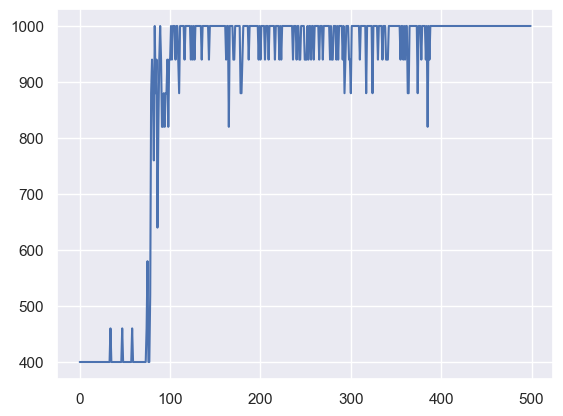

In [93]:
liste = sarsa(env, gamma = 1, alpha = 0.5, epsilon=0.5, nb_ep_limit = 5000, D=4000)
sns.set_theme(style="darkgrid")
liste = liste.reshape(-1,10).mean(axis=1)
sns.set_theme(style="darkgrid")
sns.lineplot(liste)

<AxesSubplot: >

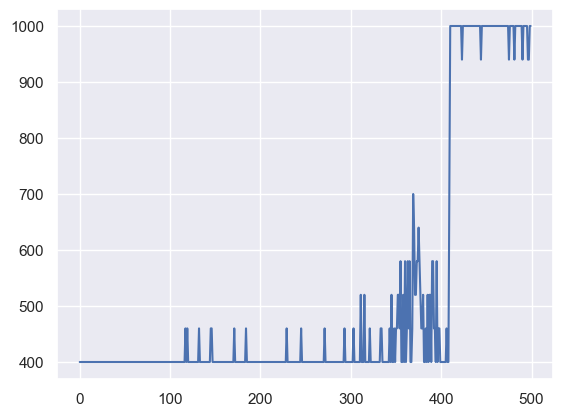

In [86]:
#liste=sarsa(env, gamma = 0.5, alpha = 0.1, epsilon=0.9, nb_ep_limit = 5000, D=4000)
#sns.set_theme(style="darkgrid")
#sns.lineplot(liste)

def generate(algo, env, gamma = 0.9, alpha = 0.1, epsilon=0.5, nb_ep_limit = 5000, D=4000):
    liste=algo(env, gamma, alpha, epsilon, nb_ep_limit, D)
    liste = liste.reshape(-1,10).mean(axis=1)
    sns.set_theme(style="darkgrid")
    return sns.lineplot(liste)

generate(sarsa, env)   

In [107]:
def softmax(q, s, nb_episode, T0, D):
    
    if nb_episode <= D:
        T = T0
    else:
        T = T0 / math.sqrt(nb_episode - D)
        
    exp_val = [math.exp(i / T) for i in q[s]]
    softmax_values = [i / np.sum(exp_val) for i in exp_val]
    return random.choices(range(len(q[s])), np.divide(softmax_values, np.sum(softmax_values)), k=1)[0]      


In [113]:
def qlearning(env, gamma = 0.5, alpha = 0.5, epsilon = 0.5, T0 = 100, nb_ep_limit = 1000, D = 4000, methode = "egreedy"):
    
    na = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), na))
    gain = np.zeros(nb_ep_limit)
    nbs = np.zeros(nb_ep_limit)
    
    for k in range(1, nb_ep_limit+1):      
        
        s = env.reset()
        while not env.is_final(s):
            
            if methode == "egreedy":
                a = egreedy(q, s, k, epsilon, D)
            elif methode == "softmax":
                a = softmax(q, s, k, T0, D)
            else:
                print("Méthode non reconnue")
                sys.exit()
            
            ns, r, final, _ = env.step(a)
            
            if final:
                
                target = r
            else:
                target = r + gamma * np.max(q[ns])
                
            gain[k-1] += r
            nbs[k-1] += 1
            q[s, a] += alpha * (target - q[s, a])
            s = ns
    
    return gain